In [2]:
import os as os
import pandas as pd
import fitz
import matplotlib.pyplot as plt

In [5]:
os.chdir("D:/Utrecht_prep/Childhood_cancer/text_mining/")
path = "D:/Utrecht_prep/Childhood_cancer/text_mining/"

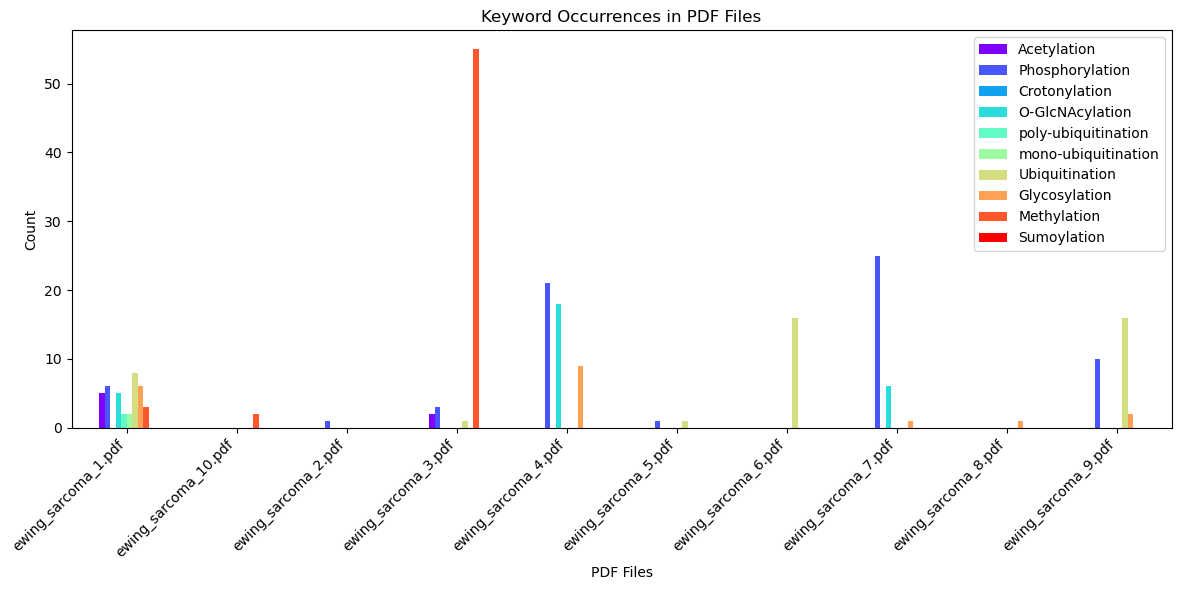

In [42]:
#Search the PDF files for the list of PTMs mentioned in the keywo

# List of keywords (case-insensitive search)
keywords = ["Acetylation","Phosphorylation","Crotonylation","O-GlcNAcylation",
           "poly-ubiquitination","mono-ubiquitination","Ubiquitination",
            "Glycosylation","Methylation","Sumoylation"]

# Directory containing PDFs
pdf_dir = path  # replace with the actual folder path

# Create a DataFrame to store counts
results_df = pd.DataFrame(columns=["PDF"] + keywords)

# Process each PDF
for filename in os.listdir(pdf_dir):
    if filename.endswith(".pdf"):
        filepath = os.path.join(pdf_dir, filename)
        doc = fitz.open(filepath)

        # Extract all text from the PDF
        text = ""
        for page in doc:
            text += page.get_text()

        # Count keyword occurrences
        counts = [text.lower().count(k.lower()) for k in keywords]
        results_df.loc[len(results_df)] = [filename] + counts

# Set 'PDF' as index
results_df.set_index("PDF", inplace=True)

# Plotting
results_df.plot(kind='bar', figsize=(12, 6), colormap='rainbow')
plt.title("Keyword Occurrences in PDF Files")
plt.ylabel("Count")
plt.xlabel("PDF Files")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [43]:
results_df

,Acetylation,Phosphorylation,Crotonylation,O-GlcNAcylation,poly-ubiquitination,mono-ubiquitination,Ubiquitination,Glycosylation,Methylation,Sumoylation
PDF,,,,,,,,,,
ewing_sarcoma_1.pdf,5,6,0,5,2,2,8,6,3,0
ewing_sarcoma_10.pdf,0,0,0,0,0,0,0,0,2,0
ewing_sarcoma_2.pdf,0,1,0,0,0,0,0,0,0,0
ewing_sarcoma_3.pdf,2,3,0,0,0,0,1,0,55,0
ewing_sarcoma_4.pdf,0,21,0,18,0,0,0,9,0,0
ewing_sarcoma_5.pdf,0,1,0,0,0,0,1,0,0,0
ewing_sarcoma_6.pdf,0,0,0,0,0,0,16,0,0,0
ewing_sarcoma_7.pdf,0,25,0,6,0,0,0,1,0,0
ewing_sarcoma_8.pdf,0,0,0,0,0,0,0,1,0,0


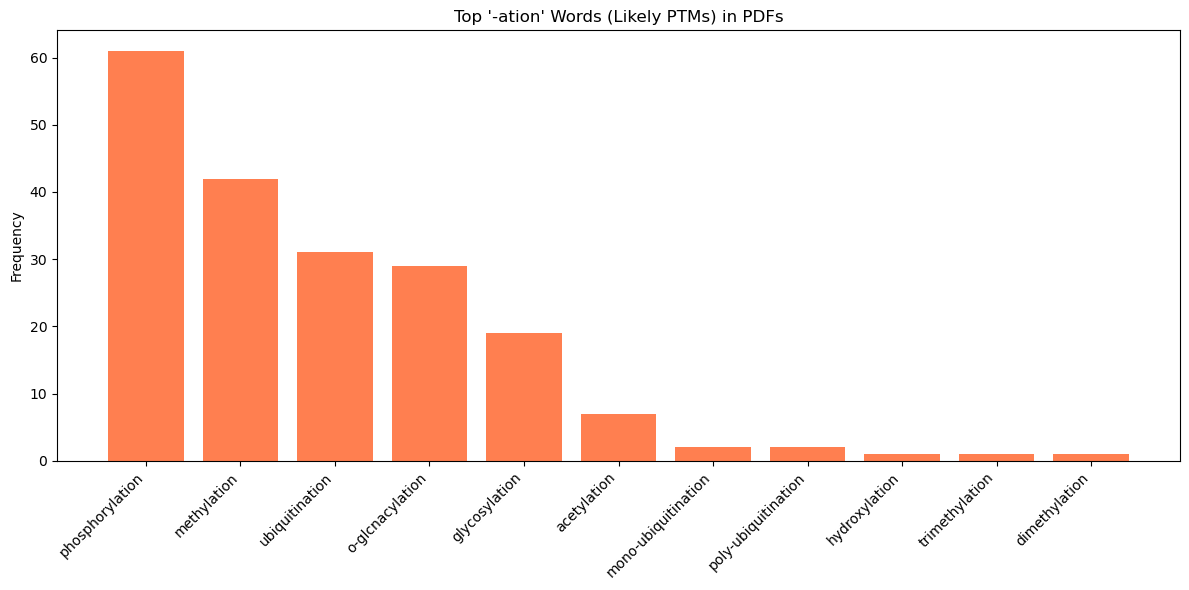

Top PTM-like '-ation' words:
phosphorylation: 61
methylation: 42
ubiquitination: 31
o-glcnacylation: 29
glycosylation: 19
acetylation: 7
mono-ubiquitination: 2
poly-ubiquitination: 2
hydroxylation: 1
trimethylation: 1
dimethylation: 1


In [45]:

#Indiscriminate search for ALL PTMs anywhere they occur

def extract_text_from_pdfs(pdf_dir):
    text_data = ""
    for filename in os.listdir(pdf_dir):
        if filename.endswith(".pdf"):
            with fitz.open(os.path.join(pdf_dir, filename)) as doc:
                for page in doc:
                    text_data += page.get_text()
    return text_data

def extract_ptm_words(text):
    # Match full words ending in 'ation', optionally prefixed with hyphens
    ptm_words = re.findall(r'\b([a-zA-Z-]{3,}ation)\b', text)
    known_ptms = {
    'acetylation', 'propionylation', 'butyrylation', 'crotonylation',
    'myristoylation', 'palmitoylation', 'succinylation', 'malonylation',
    'phosphorylation', 'pyrophosphorylation', 'thiophosphorylation',
    'methylation', 'dimethylation', 'trimethylation',
    'glycosylation', 'n-glycosylation', 'o-glycosylation', 'o-glcnacylation',
    'sialylation', 'fucosylation',
    'ubiquitination', 'mono-ubiquitination', 'poly-ubiquitination',
    'neddylation', 'sumoylation', 'isgylation', 'ufmylation', 'fatylation',
    's-nitrosylation', 's-glutathionylation', 'oxidation', 'sulfhydration', 'disulfide',
    'hydroxylation', 'deamidation', 'citrullination', 'formylation',
    'carbamylation', 'glycation', 'lactylation', 'ampylation', 'adp-ribosylation',
    'biotinylation', 'lipoylation', 'farnesylation', 'geranylgeranylation',
    'glutamylation', 'glycylation', 'prenylation', 'phosphoglycerylation',
    's-palmitoleoylation', 's-acylation'
    }
    filtered_ptms = [ptm for ptm in ptm_candidates if ptm in known_ptms]
    
    # Convert to lowercase for case-insensitive match and filter
    ptm_words_lower = [word.lower() for word in ptm_words]
    filtered_ptms = [ptm for ptm in ptm_words_lower if ptm in known_ptms]
    
    #return [word.lower() for word in ptm_words]
    return filtered_ptms

def count_and_plot(ptm_list):
    counts = Counter(ptm_list)
    common = counts.most_common(20)  # Top 20 for clarity

    # Plot
    words, freqs = zip(*common)
    plt.figure(figsize=(12, 6))
    plt.bar(words, freqs, color='coral')
    plt.xticks(rotation=45, ha='right')
    plt.title("Top '-ation' Words (Likely PTMs) in PDFs")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

    return counts

# ==== Run the pipeline ====
pdf_directory = path  # Change this to your folder
all_text = extract_text_from_pdfs(pdf_directory)
ptm_candidates = extract_ptm_words(all_text)
ptm_counts = count_and_plot(ptm_candidates)

# Optional: print top results
print("Top PTM-like '-ation' words:")
for word, count in ptm_counts.most_common(20):
    print(f"{word}: {count}")
